# <center> **K Means**

## **1. Importing data from Google Drive**

In [1]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [4]:
%cd K means

/content/drive/MyDrive/Processamento Digital de Imagem/K means


## **2. Importing libraries**

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Import grayscale images

## **3. Testing images**

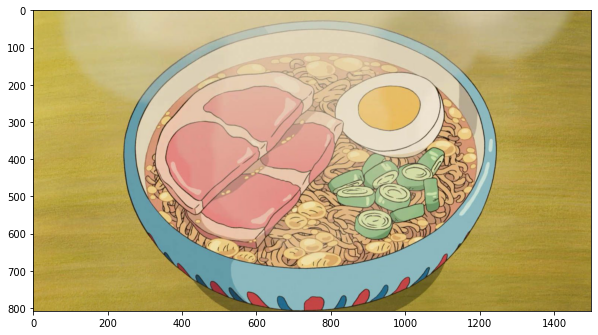

In [6]:
# Ploting with matplotlib #
img = plt.imread('images/comida.jpg')

plt.figure(figsize=(10,10))
plt.imshow(img)

plt.show()

## **4. Aplicando o K-means**

In [7]:
img = cv.imread('images/comida.jpg', cv.COLOR_BGR2RGB)

Z = img.reshape((-1,3))
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 1000, 0.0001)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

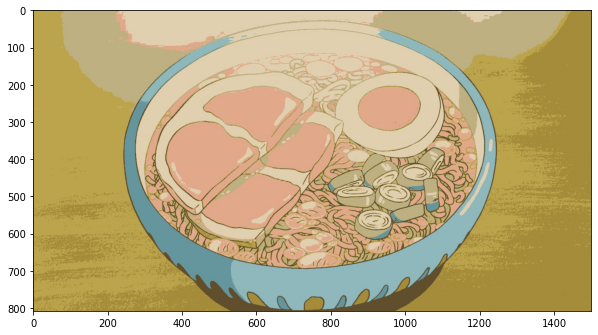

In [8]:
# Ploting with matplotlib #
cv.imwrite('images/kmeans1.jpg', res2)
img = plt.imread('images/kmeans1.jpg')

plt.figure(figsize=(10,10))
plt.imshow(img)

plt.show()

## **5. Exercise**

When we execute k-means's algorithm 10 times with the same `nRodadas=1` we get diferent results as we can see in the image bellow. This occurs because the k-means's algorithm is a stochastic method, and every time the algorithm is executed random centroids will be generated.

In [9]:
def kmeanR(nRodadas, img, K):
    
    Z = img.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nRodadas, 0.0001)
    ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    image = res.reshape((img.shape))
    
    return image

In [11]:
img = cv.imread('images/comida.jpg', cv.COLOR_BGR2RGB)

for i in range(0, 10):
    img_k = kmeanR(nRodadas=1, img=img, K=8)
    cv.imwrite('images/result'+str(i)+'.jpg', img_k)

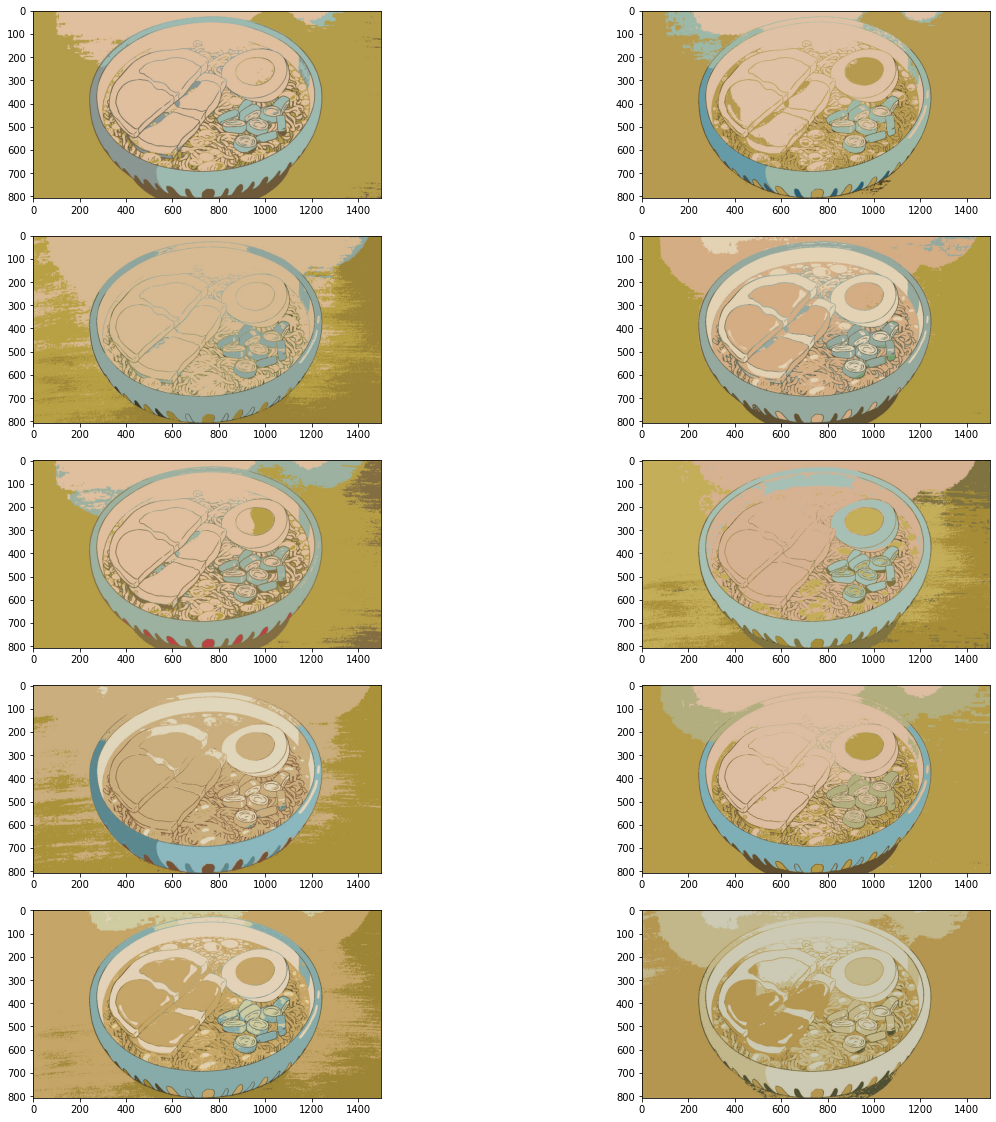

In [12]:
f, ax = plt.subplots(5, 2, figsize=(20, 20))

count = 0

for i in range(5):
    for j in range(2):
        img = plt.imread('images/result'+str(count)+'.jpg')
        ax[i][j].imshow(img)
        count += 1

plt.show()